In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

### 1. Load and explore the data

#### Load the dataset using pandas

In [2]:
data = pd.read_csv('force2020_data.csv')
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [3]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


#### Explore the structure and summary statistics of the dataset.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [5]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [6]:
data.dtypes

RHOB        float64
GR          float64
DEPTH_MD    float64
NPHI        float64
PEF         float64
DTC         float64
dtype: object

In [7]:
data.shape

(18270, 6)

In [8]:
data.isnull().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

#### Visualize the distribution of features using histograms or pair plots

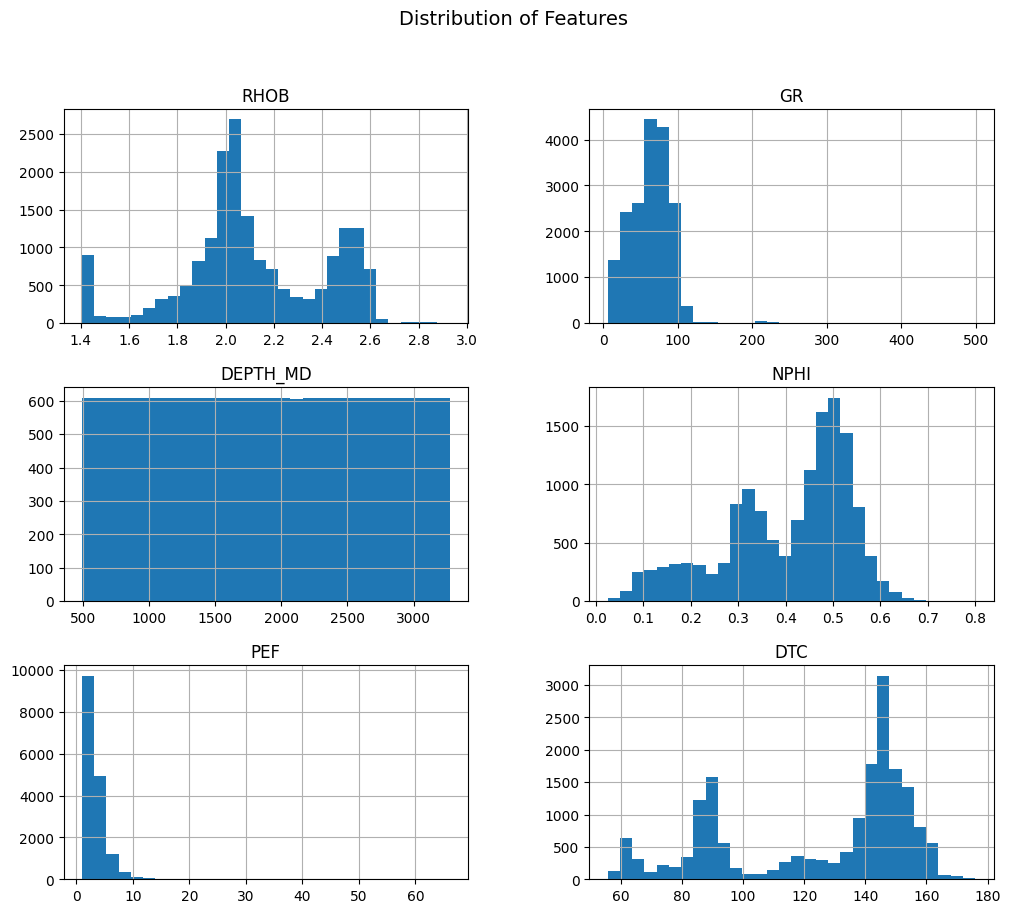

In [9]:
#creating histograms 

data.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Features', fontsize=14)
plt.show()


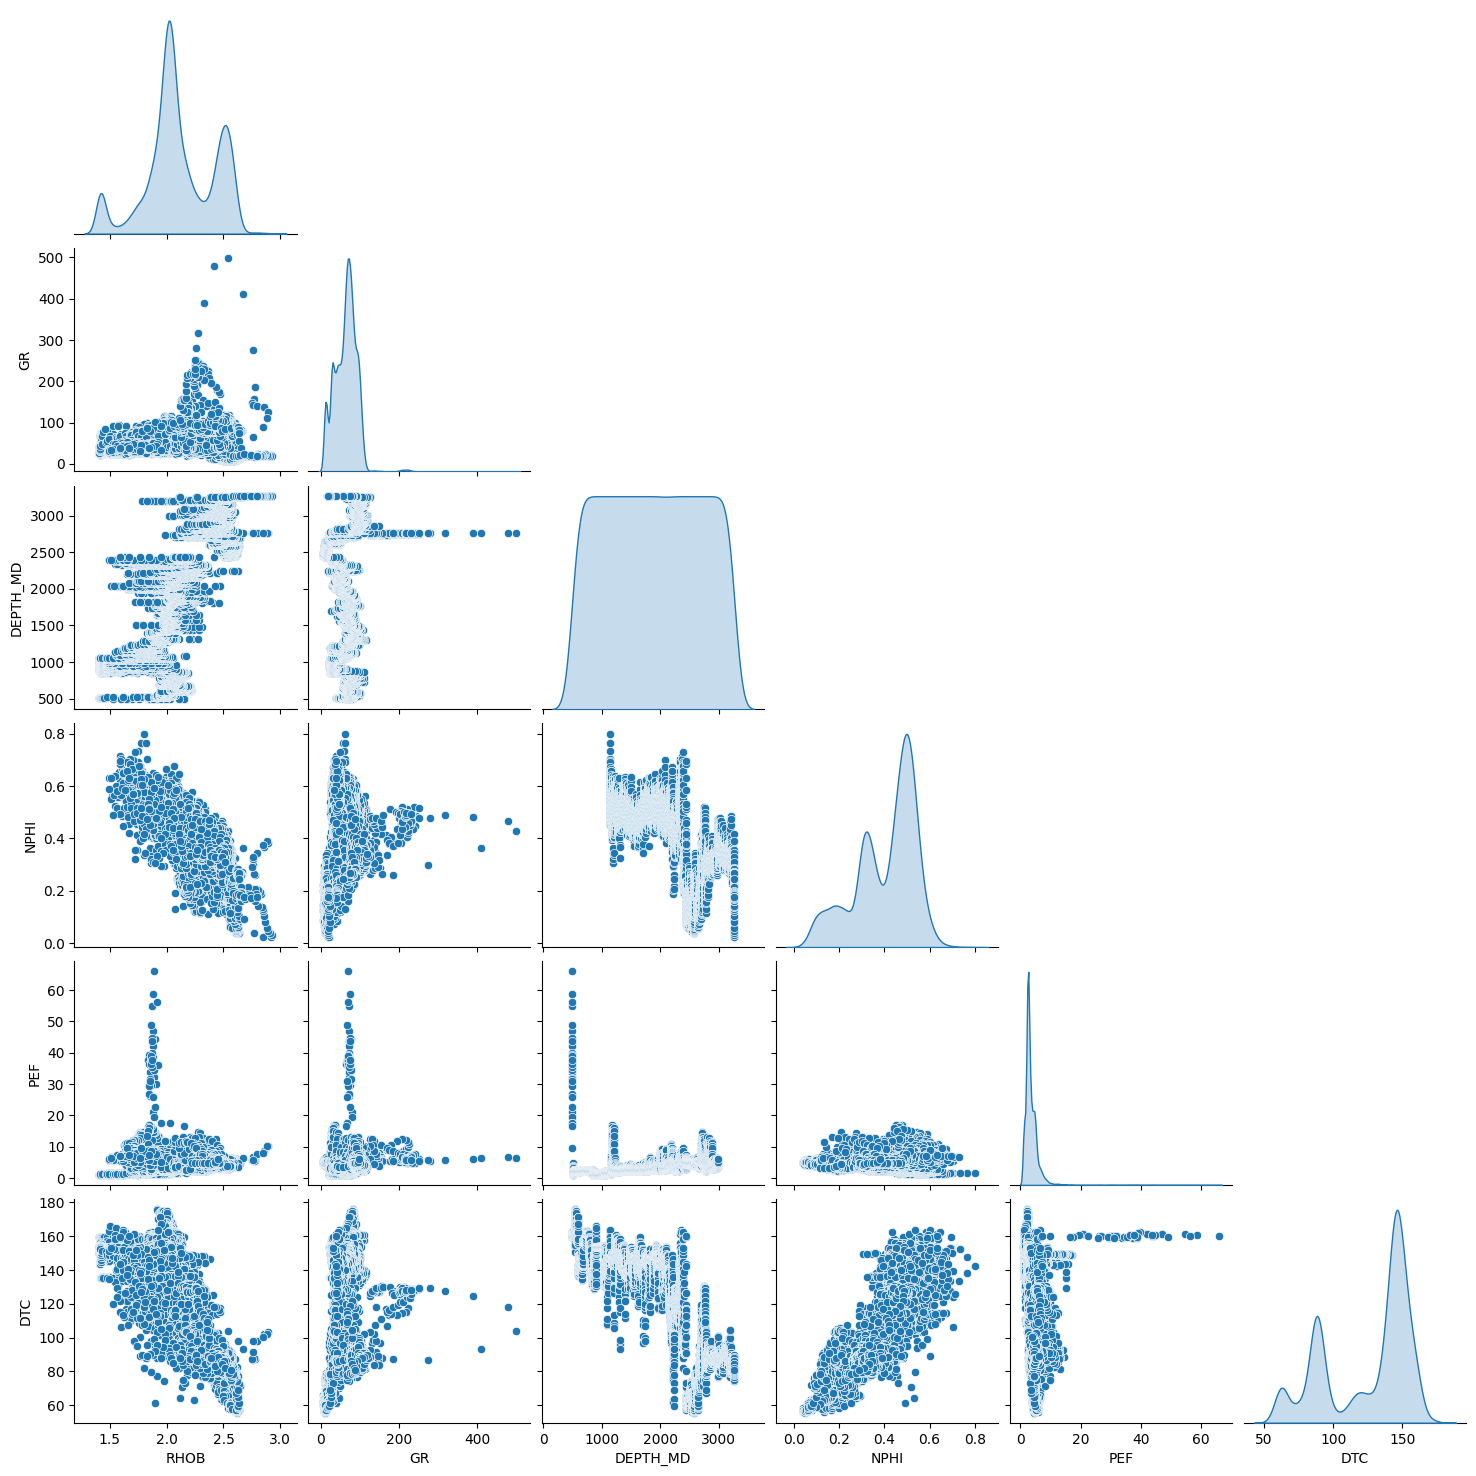

In [10]:
# using pair plots
sns.pairplot(data, diag_kind='kde', corner=True)  # 'corner=True' minimizes redundant plots
plt.show()


### 2. Preprocess the data

In [11]:
data.isnull().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [12]:
data= data.dropna()

In [13]:
# data['NPHI']= data['NPHI'].fillna(data['NPHI'].median())

In [14]:
# data['PEF']= data['PEF'].fillna(data['PEF'].median())

In [15]:
# data['DTC']= data['DTC'].fillna(data['DTC'].median())

In [16]:
data.isnull().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [17]:
data.shape

(12202, 6)

#### Standardize or normalize the dataset using StandardScaler or MinMaxScaler.

In [49]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

data[:, "RHOB"] = std_scaler.fit_transform(data[["RHOB"]])
data.loc[:, "GR"] = minmax_scaler.fit_transform(data[["GR"]])
data.loc[:, "DEPTH_MD"] = std_scaler.fit_transform(data[["DEPTH_MD"]])
data.loc[:, "NPHI"] = std_scaler.fit_transform(data[["NPHI"]])
data.loc[:, "PEF"] = minmax_scaler.fit_transform(data[["PEF"]])
data.loc[:, "DTC"] = minmax_scaler.fit_transform(data[["DTC"]])


InvalidIndexError: (slice(None, None, None), 'RHOB')

In [19]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,-1.491843,0.100848,-1.731605,2.523654,0.031750,0.851428
4239,-1.387067,0.111068,-1.731322,2.770744,0.032605,0.801002
4240,-1.320646,0.113479,-1.731038,2.524300,0.032655,0.762881
4241,-1.274390,0.111234,-1.730754,2.068584,0.031041,0.771576
4242,-1.335919,0.106141,-1.730470,1.617342,0.023785,0.818636


### 3.  Apply Clustering Algorithms

#### K-Means Clustering:

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
# Initialize lists to store metrics
wcss = []
silhouette_scores = []

# Run K-Means for a range of K values:

wcss = []
for i in range(2,11):
    km = KMeans(n_clusters = i, n_init = 10)
    km.fit(data)
    css = km.inertia_  #wcss sore
    wcss.append(css)

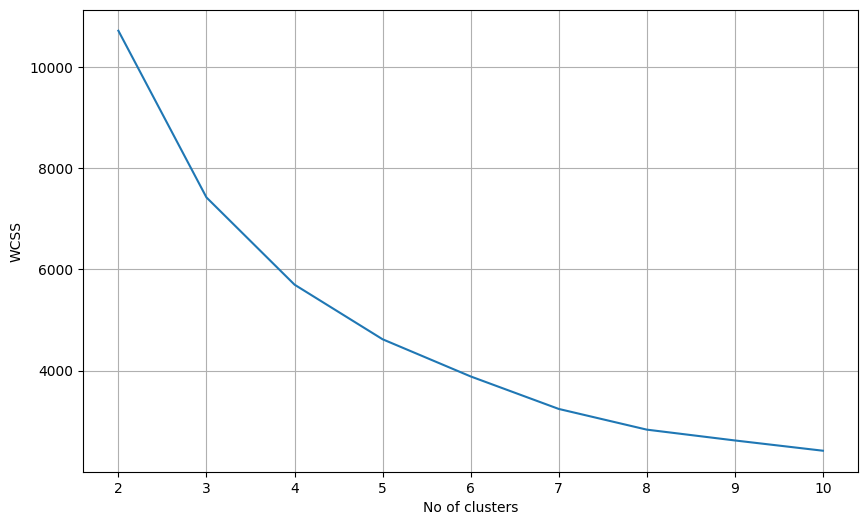

In [22]:
# Plot Elbow Curve

plt.figure(figsize=(10, 6))
plt.plot(range(2,11),wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.grid()

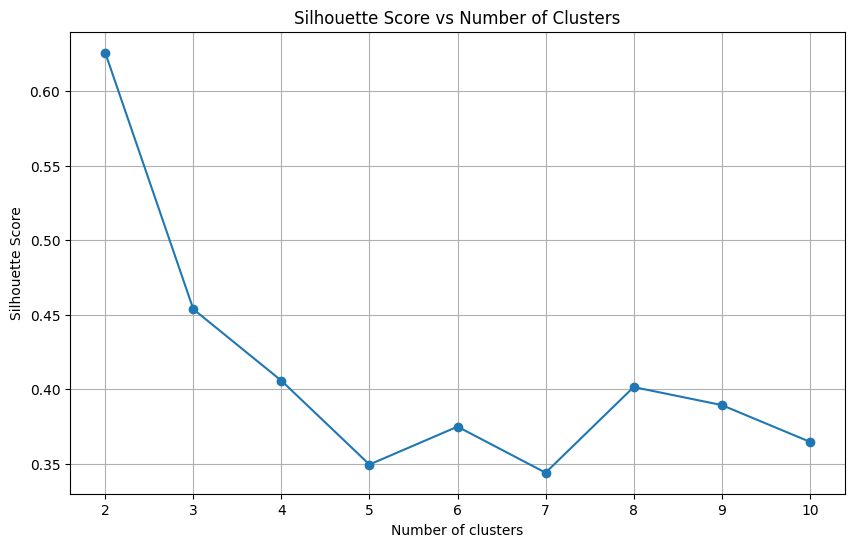

In [23]:
silhouette_scores = []

# Try k from 2 to 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid()
plt.show()

Silhouette Score 0.6258045369395542


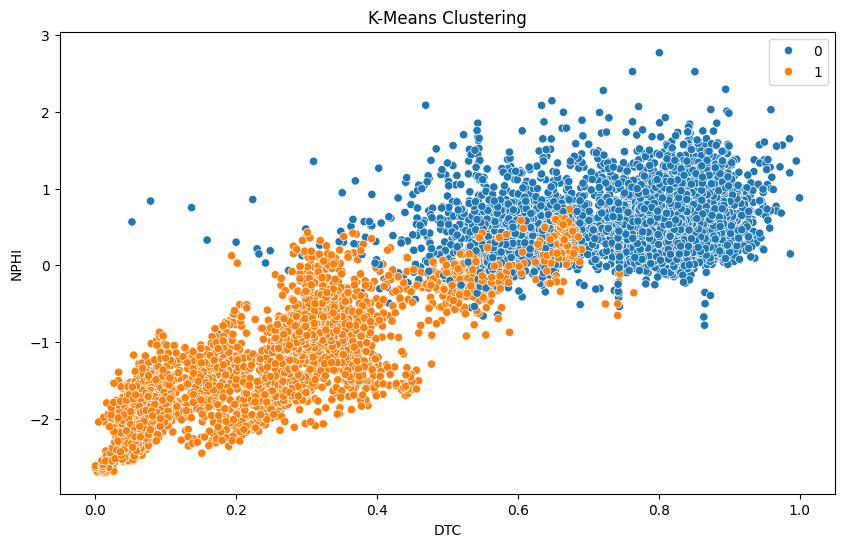

In [30]:
# Visualize the clusters using a scatter plot (use any two features).

# Apply K-Means with the optimal number of clusters
optimal_k = 2
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans_optimal.fit_predict(data)

# Calculate Silhouette Score
score = silhouette_score(data, labels)
print(f"Silhouette Score {score}")

# Scatter plot for two selected features

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['DTC'], y=data['NPHI'], hue=labels, palette='tab10')
plt.title('K-Means Clustering')
plt.xlabel('DTC')
plt.ylabel('NPHI')
plt.legend()
plt.show()


#### Agglomerative Hierarchical Clustering:


In [25]:
# Apply Agglomerative clustering with the optimal number of clusters (as found from silhouette analysis).

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Apply Agglomerative Clustering with the optimal number of clusters
optimal_k = 2 
model = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')  # Default linkage method is 'ward'
labels = model.fit_predict(data)

# Calculate Silhouette Score
score = silhouette_score(data, labels)
print(f"Silhouette Score with 'ward' linkage: {score}")


Silhouette Score with 'ward' linkage: 0.6221509676286917


In [26]:
# Try different linkage methods (e.g., 'ward', 'complete', 'average') and compare performance using Silhouette Score.

linkage_methods = ['ward', 'complete', 'average']

for method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=optimal_k, linkage=method)
    labels = model.fit_predict(data)
    score = silhouette_score(data, labels)
    print(f"Linkage Method: {method}; Silhouette Score: {score}")


Linkage Method: ward; Silhouette Score: 0.6221509676286917
Linkage Method: complete; Silhouette Score: 0.568013240513604
Linkage Method: average; Silhouette Score: 0.623793416222584


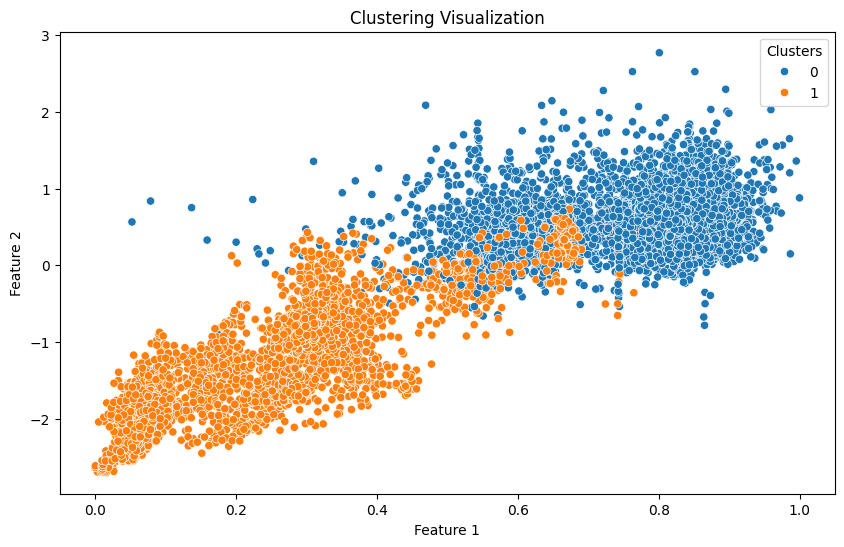

In [31]:
# Plot the clustering result using scatter plot and color the clusters.

# Scatter plot for first two features and cluster labels
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['DTC'], y=data['NPHI'],hue=labels, palette='tab10')
plt.title('Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Clusters', loc='best')
plt.show()



#### DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
results = []
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(data)
        
        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'silhouette_score': score,
                'clusters_found': len(set(labels)) - (1 if -1 in labels else 0)
            })
        else:
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'silhouette_score': None,
                'clusters_found': len(set(labels)) - (1 if -1 in labels else 0)
            })

In [35]:
results_data = pd.DataFrame(results)
print(results_data)

    eps  min_samples  silhouette_score  clusters_found
0   0.1            5         -0.404186              60
1   0.1           10         -0.177070              20
2   0.1           15         -0.115449              15
3   0.2            5         -0.037422              11
4   0.2           10         -0.017518               8
5   0.2           15          0.107063               9
6   0.3            5          0.151348               6
7   0.3           10          0.486620               2
8   0.3           15          0.379581               3
9   0.4            5          0.421987               3
10  0.4           10          0.529497               2
11  0.4           15          0.520688               2
12  0.5            5          0.000819               2
13  0.5           10          0.246478               1
14  0.5           15          0.254159               1


In [36]:
results_data.dropna().sort_values(by="silhouette_score", ascending=False)

,eps,min_samples,silhouette_score,clusters_found
10,0.4,10,0.529497,2
11,0.4,15,0.520688,2
7,0.3,10,0.486620,2
9,0.4,5,0.421987,3
8,0.3,15,0.379581,3
14,0.5,15,0.254159,1
13,0.5,10,0.246478,1
6,0.3,5,0.151348,6
5,0.2,15,0.107063,9
12,0.5,5,0.000819,2


In [37]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=10)
db.fit(data)
labels = db.labels_

In [38]:
# silhouette score

dbscan_silhouette = silhouette_score(data, labels)
print("Silhouette Score:", dbscan_silhouette)

Silhouette Score: 0.5294967048539786


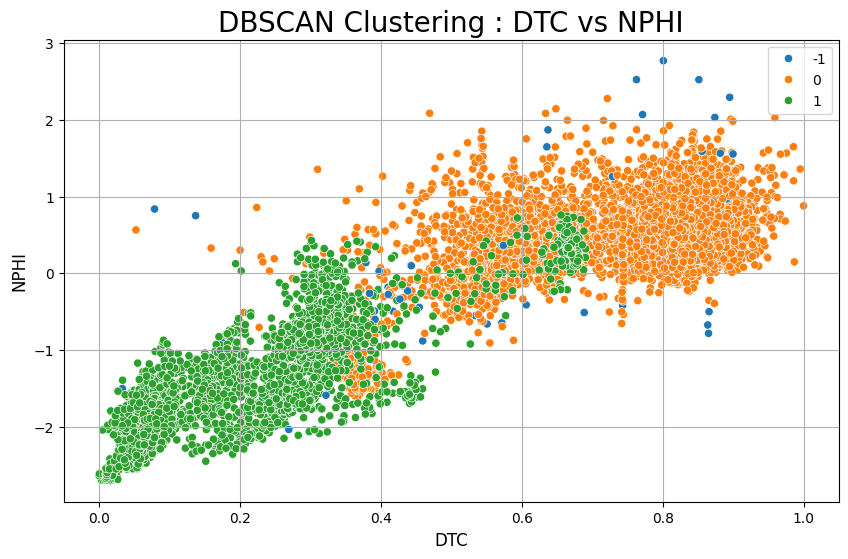

In [40]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=data['DTC'], y=data['NPHI'],hue=labels, palette='tab10')
plt.title("DBSCAN Clustering : DTC vs NPHI", fontsize=20)
plt.xlabel("DTC", fontsize=12)
plt.ylabel("NPHI", fontsize=12)
plt.grid(True)

### 4: Compare and Evaluate Clustering Algorithms

In [47]:
def comparison_performance(data):
    results = []

    # --- KMeans with k=2 to k=6 ---
    for k in range(2, 7):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        wcss = kmeans.inertia_
        results.append({
            "Algorithm": f"KMeans (k={k})",
            "Clusters": k,
            "Silhouette Score": round(score, 3),
            "WCSS": round(wcss, 2),
            "Notes": "-"
        })

    # --- Agglomerative Clustering with different linkage methods ---
    linkages = ["ward", "complete", "average"]

    for link in linkages:
        agg = AgglomerativeClustering(n_clusters=2, linkage=link)
        labels = agg.fit_predict(data)
        score = silhouette_score(data, labels)
        results.append({
            "Algorithm": f"Agglomerative ({link})",
            "Clusters": len(set(labels)),
            "Silhouette Score": round(score, 3),
            "WCSS": "N/A",
            "Notes": "-"
        })

    # --- DBSCAN ---
    db = DBSCAN(eps=0.3, min_samples=10)
    labels = db.fit_predict(data)

    # Count clusters excluding noise
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Filter out noise for silhouette
    mask = labels != -1
    if num_clusters > 1:
        score = silhouette_score(data[mask], labels[mask])
    else:
        score = None

    results.append({
        "Algorithm": "DBSCAN",
        "Clusters": num_clusters,
        "Silhouette Score": round(score, 3) if score else "N/A",
        "WCSS": "N/A",
        "Notes": "Noise detected" if -1 in labels else "-"
    })

    results_dt = pd.DataFrame(results)
    return results_dt

In [48]:
comparison_performance(data)

,Algorithm,Clusters,Silhouette Score,WCSS,Notes
0,KMeans (k=2),2,0.626,10711.64,-
1,KMeans (k=3),3,0.454,7419.99,-
2,KMeans (k=4),4,0.406,5697.35,-
3,KMeans (k=5),5,0.406,4618.98,-
4,KMeans (k=6),6,0.374,3884.99,-
5,Agglomerative (ward),2,0.622,N/A,-
6,Agglomerative (complete),2,0.568,N/A,-
7,Agglomerative (average),2,0.624,N/A,-
8,DBSCAN,2,0.619,N/A,Noise detected
